In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import re
import numpy.random

In [2]:
df = pd.read_csv("meteo-nogal-09.csv", engine = "python")

In [3]:
var =  []
for m in range(0, len(df.columns)):
    if(re.search("^Unnamed",df.columns[m]) != None):
        var.append(df.columns[m])
var

['Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35']

In [4]:
#Eliminando las columnas inválidas
df = df.drop(var, 1)
df = df.drop(0, 0)
df.head(10)

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737
5,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39
6,01-01-09,01:00,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,0.840,1.097,0.9210001,7.089
7,01-01-09,01:10,0.611,0.7270001,-0.126,8.72,1.5,-180.6,23.71,-26.72,0.9820001,8.16,0.832,1.084,0.901,6.943
8,01-01-09,01:20,0.33,0.886,-0.086,8.8,1.49,-185.3,23.63,-26.65,0.9960001,7.888,0.838,1.064,0.892,6.878
9,01-01-09,01:30,0.118,1.321,-0.071,8.69,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.8790001,6.787
10,01-01-09,01:40,0.056,1.315,-0.081,7.892,1.324,-186.5,23.63,-25.91,1.331,7.163,0.876,1.012,0.886,6.852


In [5]:
#Creando una columna "Date" con haciendo uso de "DATE"
#pasándola a formato tipo fecha, para luego eliminar a "DATE"
df["Date"] = pd.to_datetime(df.DATE)
df = df.drop("DATE", 1)
df.head()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01
2,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01
3,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01
4,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01
5,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01


In [6]:
df["Date"].head(), df["Date"].tail()

(1   2009-01-01
 2   2009-01-01
 3   2009-01-01
 4   2009-01-01
 5   2009-01-01
 Name: Date, dtype: datetime64[ns], 52634   2010-03-01
 52635   2010-03-01
 52636   2010-03-01
 52637   2010-03-01
 52638   2010-03-01
 Name: Date, dtype: datetime64[ns])

In [7]:
#Limitando los datos al intervalo de 
#2009-01-01/2009-12-31
df1 = pd.DataFrame(df[df["Date"] < "2010-01-01"])
df1.tail(5)

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date
52333,23:10:00,0.736,-0.135,12.49,1050,-76.38,NAN,NAN,2.595,12.82,0.482,1.480,0.713,5.405,NaN,2009-12-31
52334,23:20:00,0.711,-0.106,12.24,1047,-75.03,NAN,NAN,2.517,12.62,0.489,1.460,0.714,5.416,NaN,2009-12-31
52335,23:30:00,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN,2009-12-31
52336,23:40:00,0.641,-0.084,11.53,1054,-71.33,NAN,NAN,2.182,11.88,0.509,1.391,0.708,5.383,NaN,2009-12-31
52337,23:50:00,0.538,-0.075,11.31,1064,-69.4,NAN,NAN,2.102,11.54,0.516,1.360,0.701,5.338,NaN,2009-12-31


In [8]:
df1.dtypes

TIME                   object
u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
Date           datetime64[ns]
dtype: object

In [9]:
tiempo  = df1["Date"]
tiempo2 = df1["TIME"]
df1[df1.columns] = df1[df1.columns].apply(pd.to_numeric, errors="coerce")
df1["Date"] = tiempo
df1["TIME"] = tiempo2
df1.dtypes

TIME                   object
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
Date           datetime64[ns]
dtype: object

In [10]:
dara = df1.corr()
dara

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064
airT_Avg,-0.363548,-0.344386,-0.338470,-0.231403,-0.122687,0.334375,-0.121637,0.078023,-0.223757,1.000000,-0.484177,0.964464,0.088203,0.464621


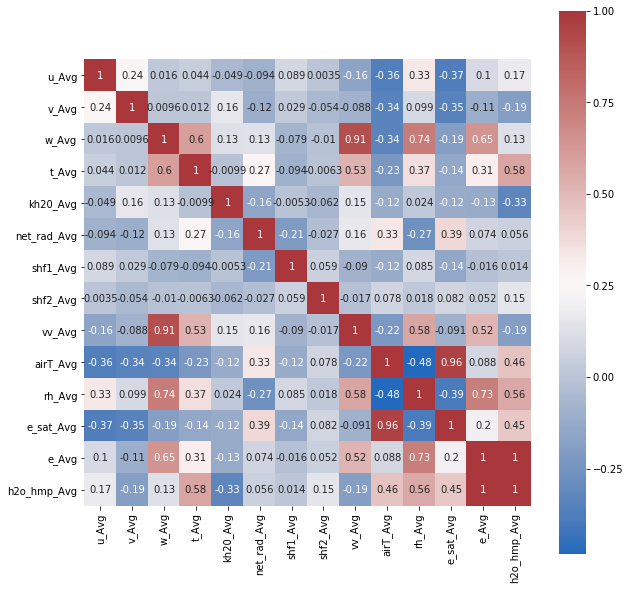

In [11]:
plt.figure(figsize=(10,10))
sb.heatmap(dara, square = True, cmap = "vlag", annot = True)

plt.show()

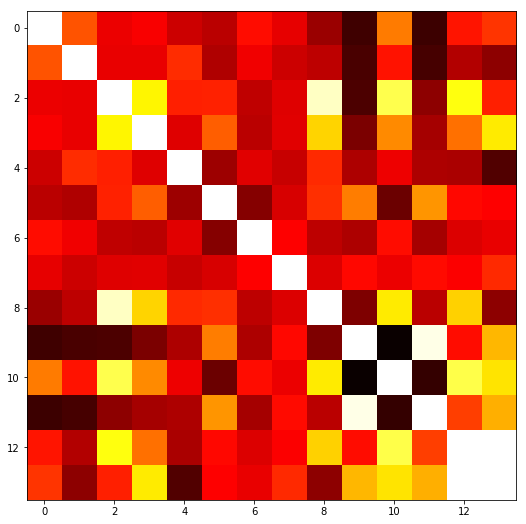

In [12]:
#Heat map con matplotlib
plt.figure(figsize=(9,9))
plt.imshow(dara, cmap="hot", interpolation="nearest")
plt.show()

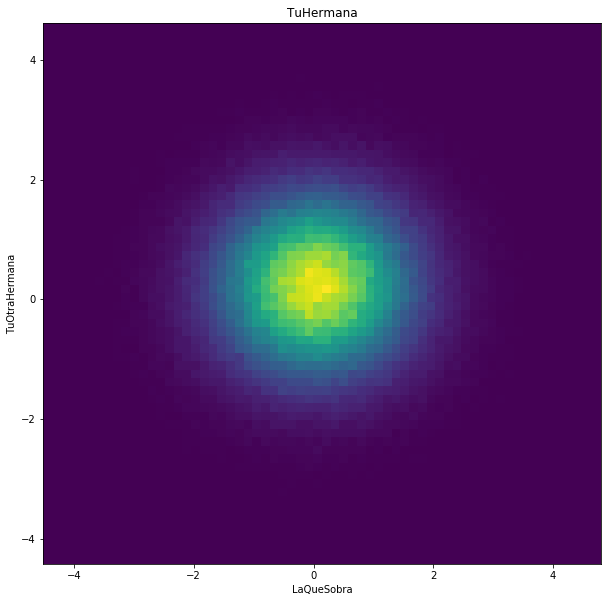

In [13]:
plt.figure(figsize=(10,10))
x=np.random.randn(409000)
y=np.random.randn(409000)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(64,64))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.title("TuHermana")
plt.ylabel("TuOtraHermana")
plt.xlabel("LaQueSobra")
plt.imshow(heatmap, extent=extent)
plt.show()

In [23]:
#Función para obtener las comparaciones de las columnas
def array(fun,first,last):
    func =[]
    for m in range(first,last):
        func.append(fun[m])
    return func

In [31]:
col = []
n = 0
for i in dara.index:
    for j in array(dara.index, n, len(dara.index)):
        if(abs(dara[i][j]) > 0.6 and i != j):
            col.append([i,j])
    n+=1

In [32]:
col

[['w_Avg', 't_Avg'],
 ['w_Avg', 'vv_Avg'],
 ['w_Avg', 'rh_Avg'],
 ['w_Avg', 'e_Avg'],
 ['airT_Avg', 'e_sat_Avg'],
 ['rh_Avg', 'e_Avg'],
 ['e_Avg', 'h2o_hmp_Avg']]

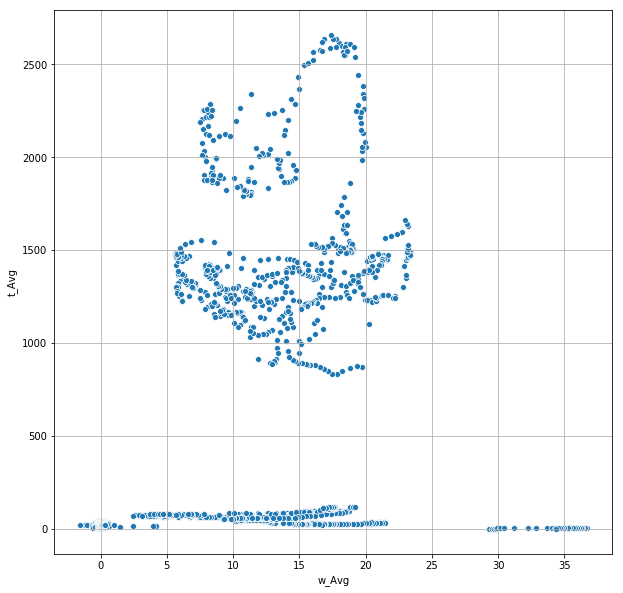

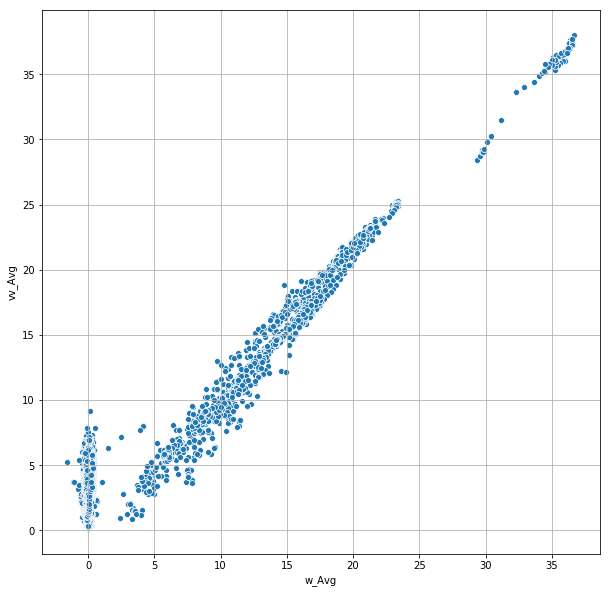

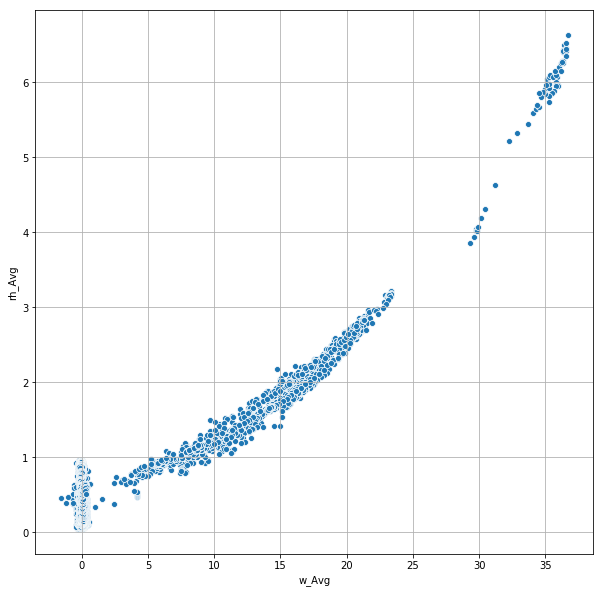

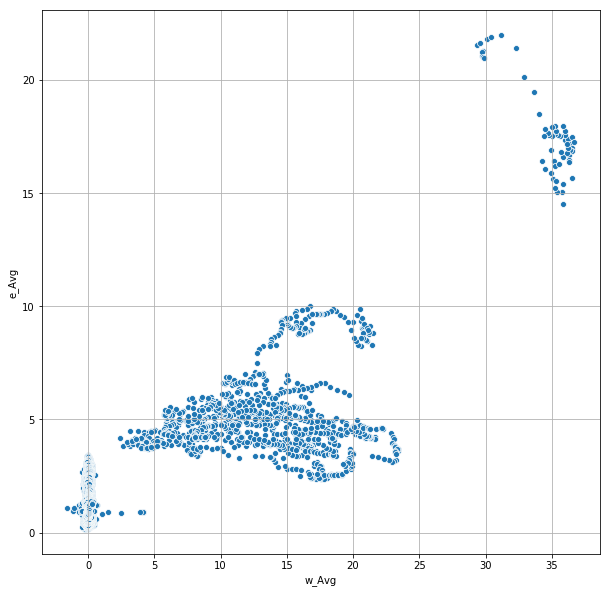

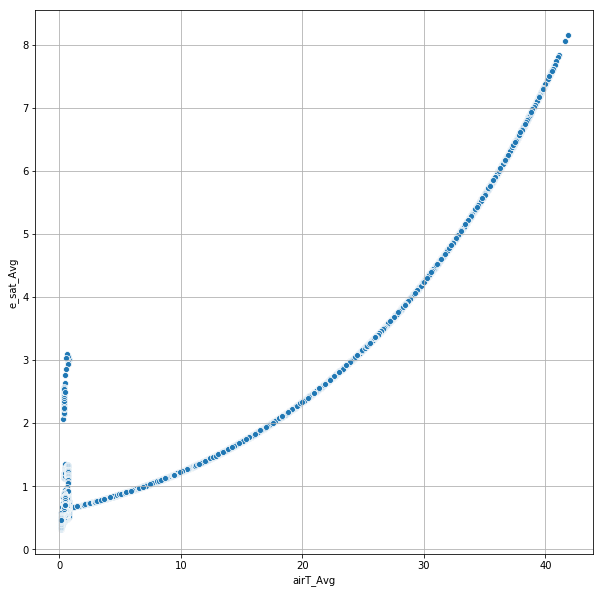

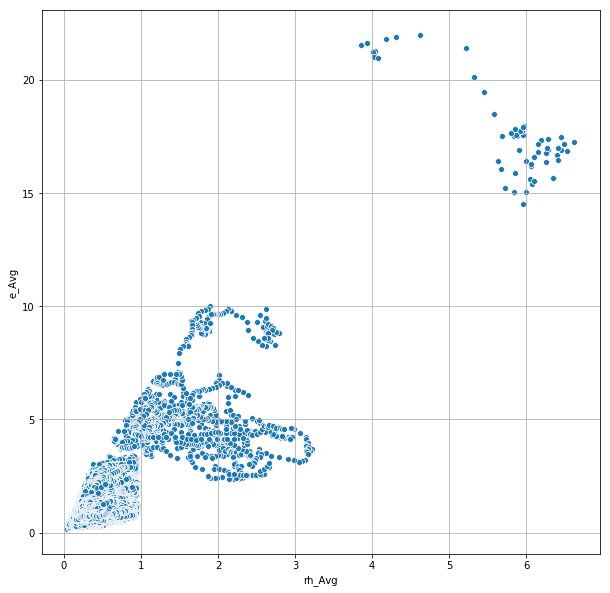

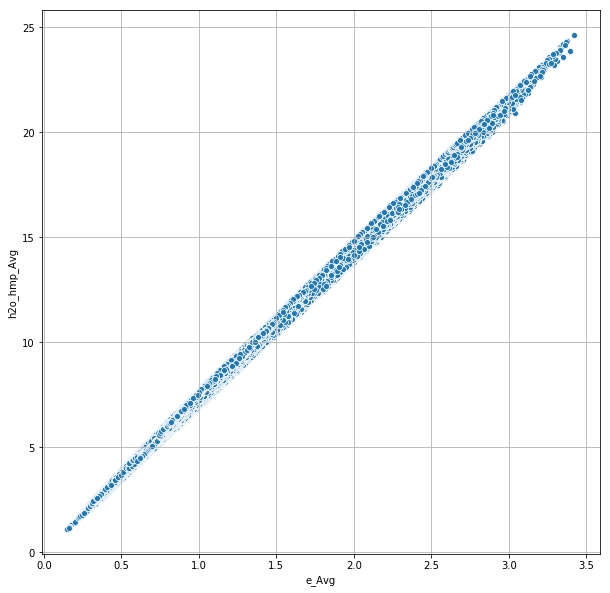

In [34]:
for i in range(0, len(col)):
    plt.figure(figsize = (10,10))
    sb_plot = sb.scatterplot(x = df1[col[i][0]], y = df1[col[i][1]])
    fig = sb_plot.get_figure()
    fig.savefig(fname = col[i][0] + "vs" + col[i][0], plt=2000)
    plt.grid()
    plt.show()